# Starter steps
1. retrieve the data from this kaggle link: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
2. install texblob onto your conda environment
3. launch jupyter notebook in the same environment, and  import pandas, matplotlib/seaborn and textblob

In [1]:
from textblob import TextBlob
# import the docx2txt library
import docx2txt
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
import pandas as pd

4. read the data into a dataframe with pandas


In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


5. filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)


In [4]:
df = df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Class Name'], axis=1)

In [5]:
df.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


6. use df.columns.str.lower() (or other preferred method) to standardise your column headers

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [8]:
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df.shape

(23486, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


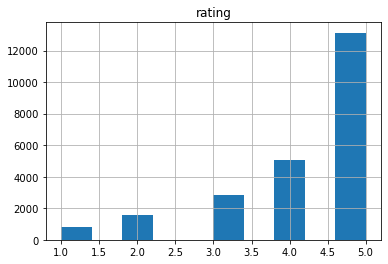

In [11]:
#we see more positive ratings
df.hist();

8. use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

In [12]:
df_group = df.groupby(["division name", "department name"]).mean()["rating"]

In [13]:
df_group

division name   department name
General         Bottoms            4.268686
                Dresses            4.163003
                Jackets            4.240310
                Tops               4.148749
                Trend              3.822917
General Petite  Bottoms            4.329356
                Dresses            4.133256
                Intimate           4.240343
                Jackets            4.304910
                Tops               4.216469
                Trend              3.782609
Initmates       Intimate           4.286285
Name: rating, dtype: float64

9. this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)
10. OPTIONAL - if you find it difficult to do this group by and visualise task in python- you can connect to the csv with Tableau and do the same chart there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_rating_tableau.png)

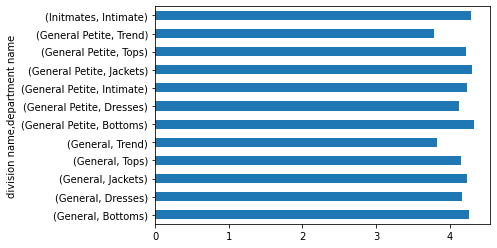

In [26]:
ax = df_group.plot(kind = 'barh', y='rating', x='average score')

11. do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [15]:
text = df.iloc[5][1]

In [16]:
testimonial = TextBlob(text)

In [17]:
testimonial.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)


12. for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)

In [18]:
testimonial.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

13. using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

In [19]:
df['review text'].isna().sum()

845

In [20]:
df.dropna(subset=['review text'], inplace=True)

14. define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

In [21]:
df['sentiment']=df['review text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
df.head()

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


15. using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [24]:
df_group2 = df.groupby(["division name", "department name"]) ["sentiment"].min()


In [25]:
df_group2

division name   department name
General         Bottoms           -0.533333
                Dresses           -0.916667
                Jackets           -0.750000
                Tops              -0.975000
                Trend             -0.270833
General Petite  Bottoms           -0.257778
                Dresses           -0.400000
                Intimate          -0.575000
                Jackets           -0.562500
                Tops              -0.700000
                Trend             -0.083333
Initmates       Intimate          -0.392333
Name: sentiment, dtype: float64

16. visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)

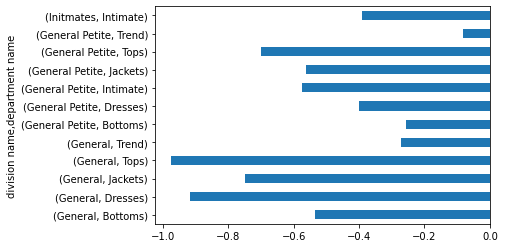

In [27]:

ax = df_group2.plot(kind = 'barh', y='polarity', x='div_dep')

17. using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

In [28]:
df_group3 = df.groupby(["division name", "department name"]).mean()["sentiment"]

In [39]:
#df_grouptest = df.groupby(["division name", "department name"]).agg({'polarity':'mean'}).reset_index()

In [29]:
df_group3

division name   department name
General         Bottoms            0.245849
                Dresses            0.251091
                Jackets            0.237141
                Tops               0.247025
                Trend              0.203986
General Petite  Bottoms            0.259258
                Dresses            0.248380
                Intimate           0.239517
                Jackets            0.241773
                Tops               0.256835
                Trend              0.195925
Initmates       Intimate           0.256979
Name: sentiment, dtype: float64

In [37]:
df_group3.dtype

dtype('float64')

In [33]:
#df_group3 = df_group3.sort_values(by='polarity')


18. visualise this summary as a simple sorted bar chart

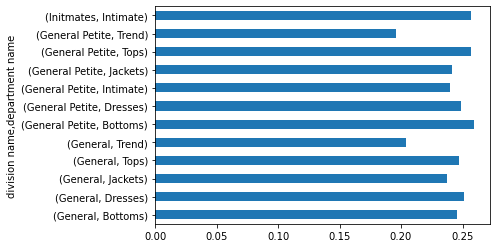

In [30]:
ax = df_group3.plot(kind = 'barh', y='polarity', x='div_dep')


19. OPTIONAL - if you find it difficult to do these group by and visualise tasks in python- you can output your data frame to a csv, then connect to that csv with Tableau and do the same charts there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_polarity_tableau.png)
20. tidy up your notebook as much as possible, removing any redundant code, and adding annotations where useful
